# Accessing Data via Web APIs

* * * 

### Icons used in this notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excercise. We'll work through these in the workshop!<br>
⚠️ **Warning**: Heads-up about tricky stuff or common mistakes.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br>

### Learning Objectives
1. [The New York Times API](#nyt)
2. [Top stories API](#top)
3. [Most Viewed and Most Shared APIs](#most)
4. [Article Search API](#search)
5. [Data Analysis](#analysis)
6. [Demo: Handling Nested Arrays of Keywords](#demo)

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

<a id='nyt'></a>

# The New York Times API

We are going to use the NYT API to demonstrate how Web APIs can be used to access useful information in an easy way. Before proceeding with this lesson, you should have already set up an API key in `01_api_lesson.md`. Copy that API key now.

## Establishing the Connection

Put the API Key you just created in the `api_key` variable in the cell below:

In [2]:
# Put your API key here
api_key = ""

You can save your API Key locally so that you don't always have to copy it. Just be sure not to put this file on Github, or else your API key may be compromised!

In [3]:
# Save your key locally
with open("nyt_api_key.txt", "w") as f:
    f.write(api_key)

In [4]:
# Read your key locally
with open("nyt_api_key.txt", "r") as f:
    api_key = f.read()

To access the NYTimes' databases, we'll be using a third-party library called [pynytimes](https://github.com/michadenheijer/pynytimes). This package provides an easy to use tool for accessing the wealth of data hosted by the Times.

To install the library, follow the instructions taken from their [Github repo](https://github.com/michadenheijer/pynytimes).

## Installation

There are multiple options to install `pynytimes`, but the easiest is by just installing it using `pip` in the Jupyter notebook itself, using a magic command:

In [5]:
%pip install pynytimes

Note: you may need to restart the kernel to use updated packages.


You can also install it via the command line or Anaconda Navigator - whichever you're more comfortable with.

Once the package installed, let's go ahead import the library and initialize a connection to their servers using our api keys.

In [6]:
# Import the NYTAPI object which we'll use to access the API
from pynytimes import NYTAPI

In [7]:
# Intialize the NYT API class into an object using your API key
nyt = NYTAPI(api_key, parse_dates=True)

Ta-da! We are now ready to make some API calls!

## Making API Calls

 Now that we've established a connection to New York Times' rich database, let's go over what kind of data and privileges we have access to.

### APIs

[Here is the collection of the APIs the NYT gives us:](https://developer.nytimes.com/apis)

- [Top stories](https://developer.nytimes.com/docs/top-stories-product/1/overview): Returns an array of articles currently on the specified section 
- [Most viewed/shared articles](https://developer.nytimes.com/docs/most-popular-product/1/overview): Provides services for getting the most popular articles on NYTimes.com based on emails, shares, or views.
- [Article search](https://developer.nytimes.com/docs/articlesearch-product/1/overview): Look up articles by keyword. You can refine your search using filters and facets.
- [Books](https://developer.nytimes.com/docs/books-product/1/overview): Provides information about book reviews and The New York Times Best Sellers lists.
- [Movie reviews](https://developer.nytimes.com/docs/movie-reviews-api/1/overview): Search movie reviews by keyword and opening date and filter by Critics' Picks.
- [Times Wire](https://developer.nytimes.com/docs/timeswire-product/1/overview): Get links and metadata for Times' articles as soon as they are published on NYTimes.com. The Times Newswire API provides an up-to-the-minute stream of published articles.
- [Tag query (TimesTags)](https://developer.nytimes.com/docs/timestags-product/1/overview): Provide a string of characters and the service returns a ranked list of suggested terms.
- [Archive metadata](https://developer.nytimes.com/docs/archive-product/1/overview): Returns an array of NYT articles for a given month, going back to 1851.

<a id='top'></a>

# Top Stories API

Let's look at the top stories of the day. All we have to do is call a single method on the `nyt` object:

In [8]:
# Get all the top stories from the home page
top_stories = nyt.top_stories()

print(f"top_stories is a list of length {len(top_stories)}")

top_stories is a list of length 23


The `top_stories` method has a single paramater called `section` parameter defaults to "home".

In [9]:
# Preview the results
top_stories[:2]

[{'section': 'world',
  'subsection': 'europe',
  'title': 'An Inside Job',
  'abstract': 'The Kakhovka dam was designed to withstand almost any attack imaginable — from the outside. An inside job was another matter.',
  'url': 'https://www.nytimes.com/interactive/2023/06/16/world/europe/ukraine-kakhovka-dam-collapse.html',
  'uri': 'nyt://interactive/6634142e-5a77-5702-b140-c5c9287a675c',
  'byline': 'By James Glanz, Marc Santora, Pablo Robles, Haley Willis, Lauren Leatherby, Christoph Koettl and Dmitriy Khavin',
  'item_type': 'Interactive',
  'updated_date': datetime.datetime(2023, 6, 16, 19, 55, 15, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
  'created_date': datetime.datetime(2023, 6, 16, 19, 55, 15, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
  'published_date': datetime.datetime(2023, 6, 16, 19, 55, 15, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
  'material_type_facet': '',
  'kicker': '',
  'des_

This is pretty typical output for data pulled from an API. We are looking at a list of nested JSON dictionaries.

When working with a new API, a good way to establish an understanding of the data is to inspect a single object in the collection. Let's grab the first story in the array and inspect its attributes and data:

In [10]:
top_story = top_stories[0]
top_story

{'section': 'world',
 'subsection': 'europe',
 'title': 'An Inside Job',
 'abstract': 'The Kakhovka dam was designed to withstand almost any attack imaginable — from the outside. An inside job was another matter.',
 'url': 'https://www.nytimes.com/interactive/2023/06/16/world/europe/ukraine-kakhovka-dam-collapse.html',
 'uri': 'nyt://interactive/6634142e-5a77-5702-b140-c5c9287a675c',
 'byline': 'By James Glanz, Marc Santora, Pablo Robles, Haley Willis, Lauren Leatherby, Christoph Koettl and Dmitriy Khavin',
 'item_type': 'Interactive',
 'updated_date': datetime.datetime(2023, 6, 16, 19, 55, 15, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 'created_date': datetime.datetime(2023, 6, 16, 19, 55, 15, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 'published_date': datetime.datetime(2023, 6, 16, 19, 55, 15, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 'material_type_facet': '',
 'kicker': '',
 'des_facet': ['Russ

We are provided a diverse collection of data for the article ranging from the expected (title, author, section) and to NLP-derived information such as named entities. Notice that the full article itself is not included - the API does not provide that to us.

🔔 **Question**: Does anything about the data stand out to you? What bits of information could be useful to you and your research needs?

💡 **Tip**: If we are interested in a specific section, we can pass in one of the following tags into the `section` parameter:


```arts```, ```automobiles```, ```books```, ```business```, ```fashion```, ```food```, ```health```, ```home```, ```insider```, ```magazine```, ```movies```, ```national```, ```nyregion```, ```obituaries```, ```opinion```, ```politics```, ```realestate```, ```science```, ```sports```, ```sundayreview```, ```technology```, ```theater```, ```tmagazine```, ```travel```, ```upshot```, and ```world```.


In [11]:
top_arts_stories = nyt.top_stories(section='arts')
print(top_arts_stories[0]['section'])
top_arts_stories[0]

arts


{'section': 'arts',
 'subsection': 'music',
 'title': 'U.S. Orchestras Gradually Diversify but Are Slow to Hire Black Musicians',
 'abstract': 'The number of Asian and Latino players has risen over the past decade, according to a new report. But Black musicians are still scarce, especially at large orchestras.',
 'url': 'https://www.nytimes.com/2023/06/16/arts/music/orchestra-diversity.html',
 'uri': 'nyt://article/ff685ef3-958e-5614-8d8e-df6568abd4a8',
 'byline': 'By Javier C. Hernández',
 'item_type': 'Article',
 'updated_date': datetime.datetime(2023, 6, 17, 13, 25, 56, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 'created_date': datetime.datetime(2023, 6, 16, 13, 15, 18, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 'published_date': datetime.datetime(2023, 6, 16, 13, 15, 18, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 'material_type_facet': '',
 'kicker': '',
 'des_facet': ['Classical Music',
  'Minor

## 🥊 Challenge: Find the top stories for a section

- Choose 2 sections. Grab their top stories and store them in two separate lists.
- How many stories are each in section?
- What is the title of the first story in each list?

In [17]:
# Section 1: Politics
top_politics_stories = nyt.top_stories(section='politics')
print(top_politics_stories[0]['section'])
top_politics_stories[0]
print(f"The Politics section has {len(top_politics_stories)} top stories.")



us
The Politics section has 25 top stories.


In [18]:
# Section 2: Science
top_sci_stories = nyt.top_stories(section='science')
print(top_sci_stories[0]['section'])
top_sci_stories[0]
print(f"The Science section has {len(top_sci_stories)} top stories.")



science
The Science section has 27 top stories.


## Organizing the API Results into a `pandas` DataFrame

In order to conduct subsequent data analysis, we need to convert the list of JSON data to a `pandas` DataFrame. `pandas` allows us to simply pass in the JSON list and produce a clean table in one line of code. 

First, let's see what happens when we pass in `top_stories` to `pd.json_normalize`:

In [19]:
# Convert to DataFrmae
df = pd.json_normalize(top_stories)
# View the first 5 rows
df.head()

,section,subsection,title,abstract,url,uri,byline,item_type,updated_date,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,world,europe,An Inside Job,The Kakhovka dam was designed to withstand alm...,https://www.nytimes.com/interactive/2023/06/16...,nyt://interactive/6634142e-5a77-5702-b140-c5c9...,"By James Glanz, Marc Santora, Pablo Robles, Ha...",Interactive,2023-06-16 19:55:15-04:00,2023-06-16 19:55:15-04:00,2023-06-16 19:55:15-04:00,,,"[Russian Invasion of Ukraine (2022), Levees an...",[],[],"[Ukraine, Russia, Kherson (Ukraine)]",[{'url': 'https://static01.nyt.com/images/2023...,https://nyti.ms/3Nc5R2W
1,world,europe,"Russia, Learning From Costly Mistakes, Shifts ...",Moscow’s forces remain uneven. But while braci...,https://www.nytimes.com/2023/06/17/world/europ...,nyt://article/70664898-2ed5-567a-8cbb-bd3f718f...,"By Thomas Gibbons-Neff, Julian E. Barnes and N...",Article,2023-06-17 23:15:39-04:00,2023-06-17 05:00:55-04:00,2023-06-17 05:00:55-04:00,,,"[Defense and Military Forces, Russian Invasion...",[Wagner Group],[],"[Russia, Ukraine]",[{'url': 'https://static01.nyt.com/images/2023...,https://nyti.ms/3PifRdJ
2,us,,Scathing Report on Police Leaves Minneapolis R...,The Justice Department’s devastating findings ...,https://www.nytimes.com/2023/06/17/us/minneapo...,nyt://article/6f13118a-87f3-5032-9790-6dd46540...,By Ernesto Londoño and Dan Simmons,Article,2023-06-17 19:56:42-04:00,2023-06-17 19:56:42-04:00,2023-06-17 19:56:42-04:00,,,"[Police Brutality, Misconduct and Shootings, P...","[Police Department (Minneapolis, Minn)]","[Floyd, George (d 2020)]",[Minneapolis (Minn)],[{'url': 'https://static01.nyt.com/images/2023...,https://nyti.ms/3NAUumD
3,us,,Here Are the Most Significant Findings Against...,The key findings in the report echo complaints...,https://www.nytimes.com/2023/06/16/us/police-d...,nyt://article/fece1034-38f4-5c5d-9853-fa725d37...,"By Mitch Smith, Ernesto Londoño and Glenn Thrush",Article,2023-06-17 09:58:00-04:00,2023-06-16 11:06:39-04:00,2023-06-16 11:06:39-04:00,,,"[Police Brutality, Misconduct and Shootings, D...","[Justice Department, Police Department (Minnea...","[Floyd, George (d 2020), Chauvin, Derek (1976- )]",[Minneapolis (Minn)],[{'url': 'https://static01.nyt.com/images/2023...,https://nyti.ms/3Ji2l60
4,us,politics,"A Year After Dobbs, Advocates Push in the Stat...",After Justice Clarence Thomas cast doubt on th...,https://www.nytimes.com/2023/06/17/us/politics...,nyt://article/c5e70430-b06c-55a2-8bff-ce02f9f5...,By Sheryl Gay Stolberg,Article,2023-06-17 22:14:01-04:00,2023-06-17 05:00:51-04:00,2023-06-17 05:00:51-04:00,,,"[Birth Control and Family Planning, Abortion, ...","[Democratic Party, Republican Party]",[],[Nevada],[{'url': 'https://static01.nyt.com/images/2023...,https://nyti.ms/42LVdFT


In [20]:
# Inspect the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   section              23 non-null     object                   
 1   subsection           23 non-null     object                   
 2   title                23 non-null     object                   
 3   abstract             23 non-null     object                   
 4   url                  23 non-null     object                   
 5   uri                  23 non-null     object                   
 6   byline               23 non-null     object                   
 7   item_type            23 non-null     object                   
 8   updated_date         23 non-null     datetime64[ns, UTC-04:00]
 9   created_date         23 non-null     datetime64[ns, UTC-04:00]
 10  published_date       23 non-null     datetime64[ns, UTC-04:00]
 11  material

For the most part, `pandas` does a good job of producing a table where:

- The columns correspond with the JSON dictionary keys from our API call.
- The number of rows matches the number of articles.
- Each cell holds the corresponding value found under that article's dictionary key.

<a id='most'></a>

# Most Viewed and Most Shared APIs

Retrieving the most viewed and shared articles is also quite simple. The `days` parameter returns the most popular articles based on the last $N$ days. Keep in mind, however, that `days` can only take on one of three values: 1, 7, or 30.

In [21]:
# Retrieve the most viewed articles for today.
# The days parameter defaults to 1
most_viewed_today = nyt.most_viewed()
print(f"Title: {most_viewed_today[0]['title']}")
print(f"Section: {most_viewed_today[0]['section']}")
most_viewed_today[0]

Title: Twitch Star Signs $100 Million Deal With Rival Platform
Section: Business


{'uri': 'nyt://article/d7e4135d-4ca6-531a-9fe9-6f8d3ecc3fdd',
 'url': 'https://www.nytimes.com/2023/06/16/business/twitch-kick-xqc.html',
 'id': 100000008955619,
 'asset_id': 100000008955619,
 'source': 'New York Times',
 'published_date': datetime.date(2023, 6, 16),
 'updated': datetime.datetime(2023, 6, 17, 13, 37, 4),
 'section': 'Business',
 'subsection': '',
 'nytdsection': 'business',
 'adx_keywords': 'Video Recordings, Downloads and Streaming;Computer and Video Games;Computers and the Internet;Lengyel, Felix (xQc);Kick.com;Twitch Interactive Inc',
 'column': None,
 'byline': 'By Kellen Browning',
 'type': 'Article',
 'title': 'Twitch Star Signs $100 Million Deal With Rival Platform',
 'abstract': 'The deal signed by Félix Lengyel, known as xQc, matches traditional athletes’ contracts, and is another sign of Twitch’s tense relationship with its top streamers.',
 'des_facet': ['Video Recordings, Downloads and Streaming',
  'Computer and Video Games',
  'Computers and the Internet'

🔔 **Question**:  How many stories are provided to us via this function call?

In [22]:
len(most_viewed_today)

20

For this piece of data, we can consult a guide or what's known as a schema to understand the information at our finger tips.

The [Most Viewed Schema](https://developer.nytimes.com/docs/most-popular-product/1/types/ViewedArticle) can answer any questions we may have about this article's data:

| Attribute      | Data Type | Definition      |
| ----------- | ----------- | ----------- |
| url      | string       | Article's URL.       |
| adx_keywords   | string        | Semicolon separated list of keywords.        |
| column   | string        | Deprecated. Set to null.        |
| section   | string        | Article's section (e.g. Sports).        |
| byline   | string        | Article's byline (e.g. By Thomas L. Friedman).        |
| type   | string        | Asset type (e.g. Article, Interactive, ...).        |
| title   | string        | Article's headline (e.g. When the Cellos Play, the Cows Come Home).        |
| abstract   | string        | Brief summary of the article.|
| published_date   | string        | When the article was published on the web (e.g. 2021-04-19).        |
| source   | string        | Publisher (e.g. New York Times).        |
| id   | integer        | Asset ID number (e.g. 100000007772696).        |
| asset_id   | integer        | Asset ID number (e.g. 100000007772696).        |
| des_facet   | array        | Array of description facets (e.g. Quarantine (Life and Culture)).        |
| org_facet   | array        | Array of organization facets (e.g. Sullivan Street Bakery).        |
| per_facet   | array        | Array of person facets (e.g. Bittman, Mark).        |
| geo_facet   | array        | Array of geographic facets (e.g. Canada).        |
| media   | array        | Array of images.        |
| media.type   | string        | Asset type (e.g. image).        |
| media.subtype   | string        | Asset subtype (e.g. photo).        |
| media.caption   | string        | Media caption        |
| media.copyright   | string        | Media credit        |
| media.approved_for_syndication   | boolean        | Whether media is approved for syndication.        |
| media.media-metadata   | array        | Media metadata (url, width, height, ...).        |
| media.media-metadata.url   | string        | Image's URL.        |
| media.media-metadata.format   | string        | Image's crop name     |
| media.media-metadata.height   | integer        | Image's height |
| media.media-metadata.width   | integer        | Image's width      |

To pull most popular articles for the past weekend and month, we pass the numbers 7 or 30 into `days`

In [23]:
most_viewed_week = nyt.most_viewed(days=7)
most_viewed_month = nyt.most_viewed(days=30)

🔔 **Question**: What is the most viewed article of the last week?

In [24]:
most_viewed_week[0]['title']

'They Found a Million Pennies. Now They Need Someone to Take Them.'

🔔 **Question**: What is the most viewed article of the last month?

In [25]:
most_viewed_month[0]['title']

'Spelling Bee Buddy: Personalized Hints That Update as You Play'

## 🥊 Challenge: Most Shared Stories

The `most_shared` method is similiar to `most_viewed` except that it has an argument called `method` which is used to show the most shared articles using `'email'` or `'facebook'`.

- Grab the most shared articles for both methods for the past month.
- How many articles show up in both lists? (Hint: use the `uri` key)
- Bonus: Use the [Shared Article](https://developer.nytimes.com/docs/most-popular-product/1/types/SharedArticle) schema table to help you answer a question you may have about the data.

| Attribute      | Data Type | Definition      |
| ----------- | ----------- | ----------- |
| url      | string       | Article's URL.       |
| adx_keywords   | string        | Semicolon separated list of keywords.        |
| subsection   | string        | Article's subsection (e.g. Politics). Can be empty |
| column   | string        | Deprecated. Set to null.        |
| eta_id   | integer        | Deprecated. Set to 0.|
| section   | string        | Article's section (e.g. Sports).        |
| id   | integer        | Asset ID number (e.g. 100000007772696).        |
| asset_id   | integer        | Asset ID number (e.g. 100000007772696).        |
| nytdsection   | string        | Article's section|
| byline   | string        | Article's byline (e.g. By Thomas L. Friedman).        |
| type   | string        | Asset type (e.g. Article, Interactive, ...).        |
| title   | string        | Article's headline (e.g. When the Cellos Play, the Cows Come Home).        |
| abstract   | string        | Brief summary of the article.|
| published_date   | string        | When the article was published on the web (e.g. 2021-04-19).        |
| source   | string        | Publisher (e.g. New York Times).        |
| updated   | string        | When the article was last updated (e.g. 2021-05-12 06:32:03).|
| des_facet   | array        | Array of description facets (e.g. Quarantine (Life and Culture)).        |
| org_facet   | array        | Array of organization facets (e.g. Sullivan Street Bakery).        |
| per_facet   | array        | Array of person facets (e.g. Bittman, Mark).        |
| geo_facet   | array        | Array of geographic facets (e.g. Canada).        |
| media   | array        | Array of images.        |
| media.type   | string        | Asset type (e.g. image).        |
| media.subtype   | string        | Asset subtype (e.g. photo).        |
| media.caption   | string        | Media caption        |
| media.copyright   | string        | Media credit        |
| media.approved_for_syndication   | boolean        | Whether media is approved for syndication.        |
| media.media-metadata   | array        | Media metadata (url, width, height, ...).        |
| media.media-metadata.url   | string        | Image's URL.        |
| media.media-metadata.format   | string        | Image's crop name     |
| media.media-metadata.height   | integer        | Image's height |
| media.media-metadata.width   | integer        | Image's width      |
| uri   | string        | An article's globally unique identifier.      |

In [31]:
# Most emailed
# ?nyt.most_shared
most_email_month = nyt.most_shared(days=30, method='email')
len(most_email_month)

20

In [32]:
# Most Facebook
# ?nyt.most_shared
most_facebook_month = nyt.most_shared(days=30, method='facebook')
len(most_facebook_month)

20

In [34]:
# Using uri key
email_id = [story["uri"] for story in most_email_month]
facebook_id = [story["uri"] for story in most_facebook_month]

In [35]:
# Both lists
len(set(email_id).intersection(set(facebook_id)))

5

In [36]:
print(f"{len(set(email_id).intersection(set(facebook_id)))} stories overlap on the lists of 30-day most shared by email and 30-day most shared by Facebook.")

5 stories overlap on the lists of 30-day most shared by email and 30-day most shared by Facebook.


<a id='search'></a>

# Article Search API

Let's take it up a notch and use the search API to retrieve a set of articles about a particular topic in a chosen period of time.

We'll use the `article_search` function. Two relevant parameters include:

- `query`: The search query
- `results`: Number of articles returned. The default is 10.

Let's try pulling the 20 most recent articles about Berkeley:

In [37]:
articles = nyt.article_search(query="Berkeley", results=20)

Let's look at the main headlines of these articles:

In [38]:
headlines = [article['headline']['main'] for article in articles]
headlines

['A Tale of Paradise, Parking Lots and My Mother’s Berkeley Backyard',
 'In Berkeley, a Library Protest Is a Fight for Anthropology in an A.I. Age',
 'A Philosopher and a Slaver, but No Longer a Name on a Library',
 'Oumuamua Was a Comet After All, a Study Suggests',
 'David Lance Goines, Who Shaped the Counterculture Aesthetic, Dies at 77',
 'Tom Luddy, a Behind-the-Scenes Force in Cinema, Dies at 79',
 'How the Gas-Stove Debate Has Played Out in California',
 'At Berkeley Law, a Debate Over Zionism, Free Speech and Campus Ideals',
 'Berkeley on a Budget',
 'Berkeley',
 'The Berkeley Model',
 'Weekend in Berkeley',
 "From Busby Berkeley To 60's Berkeley",
 'Berkeley Bubble',
 'Life and Combat for Republicans at Berkeley',
 'BERKELEY AFTERSHOCK',
 'Restaurant Review: Gather, in Berkeley, Calif.',
 'The Winning Recipe: Born in Berkeley Burgers',
 'The Talk of Berkeley',
 'New Protests at Berkeley']

We can also take a peek at the first article provided. We're going to remove the `multimedia` key in order to make it more easy to view:

In [39]:
del articles[0]['multimedia']
articles[0]

{'abstract': 'Plans to build apartments have sparked a fight between progressive newcomers and nostalgic old-timers — with surprising allegiances in a writer’s hometown.',
 'web_url': 'https://www.nytimes.com/2023/05/30/magazine/housing-berkeley-yimby-fight.html',
 'snippet': 'Plans to build apartments have sparked a fight between progressive newcomers and nostalgic old-timers — with surprising allegiances in a writer’s hometown.',
 'lead_paragraph': 'In the late 1960s, in the neighborhood where I grew up, construction crews began work on the planned North Berkeley BART station by demolishing several city blocks. They cleared four square blocks around what would become the station itself, plus an adjacent five-block strip to build tunnels. Early proposals included replacing the demolished homes with new apartment buildings, but that never happened. The entire parcel around the station became a parking lot, and the linear five-block parcel became an urban wildland of blackberry brambles

Notice that not all article data comes in the same format. Data from the search API is presented differently from that of the Most Viewed and Top Stories APIs.

There are schemas for the above data. Unfortunately, they do not have definitions.

- [Article Schema](https://developer.nytimes.com/docs/articlesearch-product/1/types/Article)
- [Byline](https://developer.nytimes.com/docs/articlesearch-product/1/types/Byline)
- [Headline](https://developer.nytimes.com/docs/articlesearch-product/1/types/Headline)
- [Keyword](https://developer.nytimes.com/docs/articlesearch-product/1/types/Keyword)
- [Multimedia](https://developer.nytimes.com/docs/articlesearch-product/1/types/Multimedia)
- [Person](https://developer.nytimes.com/docs/articlesearch-product/1/types/Person)

Let's try this again, but for a specific time period. 

For example, how would we retrieve all the articles about the first two months of the George Floyd protests?

We need to pass a dictionary to the `dates` argument which contains keys named "begin" and "end". Those two keys point to `datetime` objects that we'll use as time markers. We're also going to use the `options` argument to filter and sort our results.

In [40]:
# Set up start and end date objects
begin = datetime(2020, 5, 23) # May 23, 2020
end = datetime(2020, 7, 23) # July 23, 2020

# Create a dictionary containing the datetime objects
date_dict = {"begin": begin, "end": end}

# Create options dictionary
options_dict = {
    # Sort from earliest to latest
    "sort": "oldest",
    # Return only articles from New York Times (filters out other sources such as AP and Reuters)
    "sources": ["New York Times"],
    # Return only news, analyses, and articles
    "type_of_material": ["News Analysis", "News", "Article"]
}

articles = nyt.article_search(
    query="George Floyd protest",
    results=100,
    dates=date_dict,
    options=options_dict)

/Users/blueraspberry/anaconda3/lib/python3.10/site-packages/pynytimes/helpers/article_search.py:33: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [41]:
# Grab first article and drop the multimedia key to reduce clutter
article = articles[0]
del article["multimedia"]

# Check out results
article

{'abstract': '“Being black in America should not be a death sentence,” the city’s mayor said as video of the arrest was widely shared.',
 'web_url': 'https://www.nytimes.com/2020/05/26/us/minneapolis-police-man-died.html',
 'snippet': '“Being black in America should not be a death sentence,” the city’s mayor said as video of the arrest was widely shared.',
 'lead_paragraph': 'The F.B.I. and Minnesota law enforcement authorities are investigating the arrest of a black man who died after being handcuffed and pinned to the ground by an officer’s knee, in an episode that was recorded on video by a bystander and that sparked large protests in Minneapolis on Tuesday.',
 'print_section': 'A',
 'print_page': '23',
 'source': 'The New York Times',
 'headline': {'main': '‘I Can’t Breathe’: 4 Minneapolis Officers Fired After Black Man Dies in Custody',
  'kicker': None,
  'content_kicker': None,
  'print_headline': ' F.B.I. Investigating Arrest; 4 Police Officers Lose Jobs',
  'name': None,
  'se

## 🥊 Challenge: Article Searching

- Retrieve a set of articles for a query of your choice.
- Use a relevant time interval in constructing your `dates` dictionary
- Use `type_of_material` and `section_name` as keys in your `options` dictionary.
    - For `type_of_material` values refer to this [list](https://github.com/michadenheijer/pynytimes/blob/main/VALID_SEARCH_OPTIONS.md#type-of-material-values).
    - For `section_name` values refer to this [list](https://github.com/michadenheijer/pynytimes/blob/main/VALID_SEARCH_OPTIONS.md#section-name-values).

In [64]:
# Set up start and end date objects
begin = datetime(2023, 1, 1) # January 1, 2023
end = datetime(2023, 3, 1) # March 1, 2023

# Create a dictionary containing the datetime objects
date_dict = {"begin": begin, "end": end}

# Create options dictionary
options_dict = {
    # Sort from earliest to latest
    "sort": "oldest",
    # Return only articles from New York Times (filters out other sources such as AP and Reuters)
    "sources": ["New York Times"],
    # Return news, analyses, articles, columns, editorials, and front page
    "type_of_material": ["News Analysis", "News", "Article", "Column", "Editorial", "Front Page"],
    # Return front page, national, and opinion
    "section_name": ["Front Page", "National", "Opinion"]
}

# articles = nyt.article_search(
#     query="Supreme Court",
#     results=100,
#     dates=date_dict,
#     options=options_dict)

In [65]:
articles = nyt.article_search(
    query="Supreme Court",
    results=100,
    dates=date_dict,
    options=options_dict)


In [85]:
# YOUR CODE HERE
print(f"There were {len(articles)} articles about the Supreme Court.")
print(f"And the first article's title was {articles[0]['headline']['main']}.")


There were 3 articles about the Supreme Court.
And the first article's title was A Promising New Path to Protect Abortion Access.


<a id='analysis'></a>

# Data Analysis

Now, we'll perform a data analysis on many articles about the 2020 presidential election.

We are working with previously queried set of articles because making the API call will take too much time. The code used to queried the articles we'll analyze can be found in the following cell:

## Query Using the Article Search API

In [91]:
# Change this variable if you'd like to run the query yourself
run_query = False

# Only run this code if you're able to wait for the query to finish
if run_query:
    # Create datetime objects
    begin = datetime(2020, 9, 7) # September 7, 2020
    end = datetime(2020, 11, 7) # November 7, 2020
    date_dict = {"begin": begin, "end": end}

    options_dict = {
        "sort": "oldest",
        "sources": ["New York Times",],
        "type_of_material": ["News Analysis", "News", "Article", "Editorial"]
    }

    # To get the dataset we use, set n_results to 2000
    n_results = 2000
    # n_results = 10

    # Perform article search query
    articles = nyt.article_search(
         query="presidential election",
         results=n_results,
         dates=date_dict,
         options=options_dict)

    # Create DataFrame 
    df = pd.json_normalize(articles)

    # Save DataFrame
    df.to_pickle("election2020_articles.pkl")

Let's load in the previously saved data:

In [116]:
df = pd.read_pickle("../data/election2020_articles.pkl")
df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,keywords,pub_date,document_type,...,headline.main,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization
0,President Trump will try to put the media on t...,https://www.nytimes.com/2020/09/06/business/me...,President Trump will try to put the media on t...,The worst thing about being a reporter in the ...,B,3,The New York Times,"[{'name': 'subject', 'value': 'News and News M...",2020-09-07 01:30:15+00:00,article,...,Journalists Aren’t the Enemy of the People. Bu...,the media equation,None,We Aren’t the Enemy of the People. But We’re N...,None,None,None,By Ben Smith,"[{'firstname': 'Ben', 'middlename': None, 'las...",None
1,Forced underground in the 1990s to a life of c...,https://www.nytimes.com/2020/09/06/world/europ...,Forced underground in the 1990s to a life of c...,"MINSK, Belarus — Pit Pawlaw, guitar in hand, b...",A,1,The New York Times,"[{'name': 'subject', 'value': 'Demonstrations,...",2020-09-07 02:00:10+00:00,article,...,"For Aging Belarus Rockers, a Late Shot at Stardom",None,None,Aging Rockers Emerge to Lead Belarus Revolt,None,None,None,By Anton Troianovski,"[{'firstname': 'Anton', 'middlename': None, 'l...",None
2,The vice-presidential candidates will be on op...,https://www.nytimes.com/2020/09/07/us/politics...,The vice-presidential candidates will be on op...,"LA CROSSE, Wis. — Labor Day is the traditional...",NaN,NaN,The New York Times,"[{'name': 'persons', 'value': 'Harris, Kamala ...",2020-09-07 04:01:08+00:00,article,...,What to Watch For as Harris and Pence Visit Wi...,None,None,None,None,None,None,By Jonathan Martin,"[{'firstname': 'Jonathan', 'middlename': None,...",None
3,Communities are running short on time to hire ...,https://www.nytimes.com/2020/09/07/us/politics...,Communities are running short on time to hire ...,PHILADELPHIA — Unnerved by the difficulties of...,A,1,The New York Times,"[{'name': 'subject', 'value': 'Voting and Vote...",2020-09-07 07:00:09+00:00,article,...,"In Year of Voting by Mail, a Scramble to Beef ...",None,None,Safety Shapes Plans to Fortify Voting Stations,None,None,None,By Nick Corasaniti and Michael Wines,"[{'firstname': 'Nick', 'middlename': None, 'la...",None
4,Prime Minister Boris Johnson is threatening to...,https://www.nytimes.com/2020/09/07/world/europ...,Prime Minister Boris Johnson is threatening to...,LONDON — Bellicose threats to walk away from t...,A,9,The New York Times,"[{'name': 'subject', 'value': 'Great Britain W...",2020-09-07 17:15:32+00:00,article,...,"As Brexit Deadlines Loom, the Posturing and Bi...",None,None,Brinkmanship Permeates Brexit Trade Deal Sessions,None,None,None,By Mark Landler and Stephen Castle,"[{'firstname': 'Mark', 'middlename': None, 'la...",None


In [95]:
# Inspect metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   abstract                 1803 non-null   object             
 1   web_url                  1803 non-null   object             
 2   snippet                  1803 non-null   object             
 3   lead_paragraph           1803 non-null   object             
 4   print_section            1052 non-null   object             
 5   print_page               1052 non-null   object             
 6   source                   1803 non-null   object             
 7   keywords                 1803 non-null   object             
 8   pub_date                 1803 non-null   datetime64[ns, UTC]
 9   document_type            1803 non-null   object             
 10  news_desk                1803 non-null   object             
 11  section_name             1803 

## Perform Sentiment Analysis

Sentiment analysis is a common task when working with text data. Let's track the sentiment of articles about the election over the two month time period. We'll use the `vadersentiment` package to evaluate the sentiment of each article.

According to the [VADER Github Repo](https://github.com/cjhutto/vaderSentiment), "VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is *specifically attuned to sentiments expressed in social media*."

We'll start by installing the `vadersentiment` library.

In [98]:
# Install the vadersentiment library
%pip install vadersentiment

Note: you may need to restart the kernel to use updated packages.


In [99]:
# Import the SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [100]:
# Initialize analyzer object
analyzer = SentimentIntensityAnalyzer()
# Calculate the polarity scores of the lead paragraph and save it in df
df["sentiment"] = df.lead_paragraph.apply(analyzer.polarity_scores)

In [101]:
# Inspect the sentiment column
df.sentiment.head()

0    {'neg': 0.143, 'neu': 0.738, 'pos': 0.119, 'co...
1    {'neg': 0.108, 'neu': 0.828, 'pos': 0.063, 'co...
2    {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'comp...
3    {'neg': 0.037, 'neu': 0.963, 'pos': 0.0, 'comp...
4    {'neg': 0.202, 'neu': 0.736, 'pos': 0.062, 'co...
Name: sentiment, dtype: object

In [102]:
# View single row
df.sentiment.iloc[0]

{'neg': 0.143, 'neu': 0.738, 'pos': 0.119, 'compound': -0.296}

The `compound` score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most negative) and +1 (most positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. We can think of this score as a normalized, weighted composite score. It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. 

Typical threshold values are:

1. **Positive Sentiment**: compound score $\geq 0.05$
 
2. **Neutral  Sentiment**: $-0.05 <$ compound score $< 0.05$
 
3. **Negative Sentiment**: compound score $\leq -0.05$

In [103]:
# Re-assign sentiment as the compound score
df["sentiment"] = df["sentiment"].apply(lambda x: x["compound"])

Let's get a sense of the distribution of scores by calculating some summary statistics and plotting a histogram:

In [104]:
# Summary statistics
df.sentiment.describe()

count    1803.000000
mean        0.053598
std         0.476783
min        -0.984300
25%        -0.296000
50%         0.000000
75%         0.458800
max         0.980100
Name: sentiment, dtype: float64

(-1.0, 1.0)

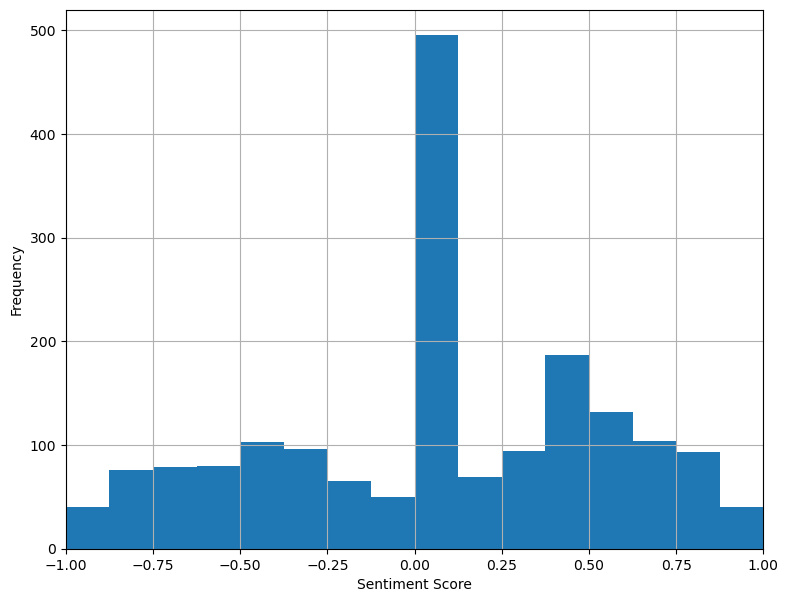

In [105]:
bins = np.linspace(-1, 1, 17)
df.sentiment.hist(bins=bins, figsize= (9, 7))
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.xlim([-1.0, 1.0])

## 🥊 Challenge: Additional Data Analysis

- What are the 3 most positive and negative texts?
- Using the VADER thresholds for positive, neutral, and negative, how many articles qualify for each of those labels?

In [117]:
# YOUR CODE HERE
%pip install pyprojroot
from pyprojroot import here
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize analyzer object
analyzer = SentimentIntensityAnalyzer()
# Calculate the sentiment scores of lead paragraph and save it in df
df["sentiment"] = df.lead_paragraph.apply(analyzer.polarity_scores)
df["sentiment"] = df["sentiment"].apply(lambda x: x["compound"])


Note: you may need to restart the kernel to use updated packages.


In [118]:
# Most positive 3
df.sort_values("sentiment", ascending = False)["headline.main"].iloc[:3].tolist()

['How the Black Vote Became a Monolith',
 'Podcasts to Inform Your Vote',
 'Having Made Peace Abroad, Ethiopia’s Leader Goes to War at Home']

In [119]:
# Most negative 3
df.sort_values("sentiment", ascending = True)["headline.main"].iloc[:3].tolist()

['How Trump’s ‘Voter Fraud’ Lie Is Disenfranchising Americans',
 'At the End of a Chaotic Campaign, an Election Day That Defied the Worst Fears',
 'Days From Election, Police Killing of Black Man Roils Philadelphia']

In [120]:
# Number of positive, negative, and neutral articles
def bin_func(x):
    if x > 0.05:
        return "positive"
    elif x < -.05:
        return "negative"
    else:
        return "neutral"
# Calculate counts
df.sentiment.apply(bin_func).value_counts()

positive    765
negative    584
neutral     454
Name: sentiment, dtype: int64

## Sentiment Over the Course of the Campaign

Let's examine how the compound score evolved over the course of the campaign. Do you have expectations on how this quantity might behave as the election nears? 

First, let's create a new `pandas` series which tracks the sentiment over time:

In [121]:
# Create a time series with publication date as the index and sentiment score as the value
sentiment_ts = pd.Series(index= df.pub_date.tolist(),
                         data = df.sentiment.tolist())

Next, we'll calculate daily and weekly averages:

In [122]:
# Resample the data with daily averages and weekly averages
daily = sentiment_ts.resample("d").mean()
weekly = sentiment_ts.resample("w").mean()

🔔 **Question**: We can plot the results below. Do you notice any patterns?

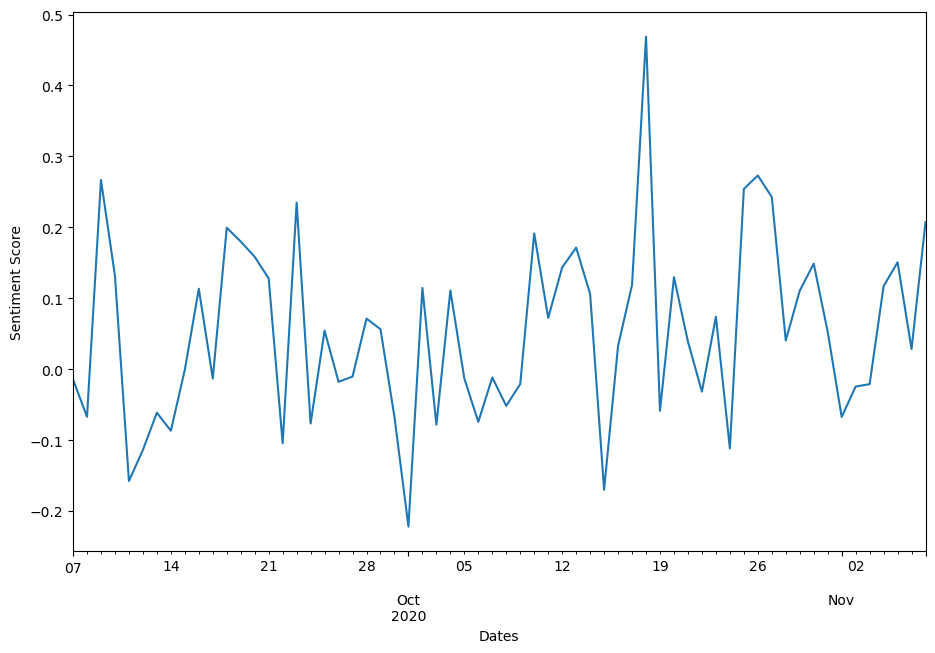

In [123]:
# Daily average sentiment of articles.
daily.plot(figsize = (11, 7))
plt.xlabel("Dates")
plt.ylabel("Sentiment Score");

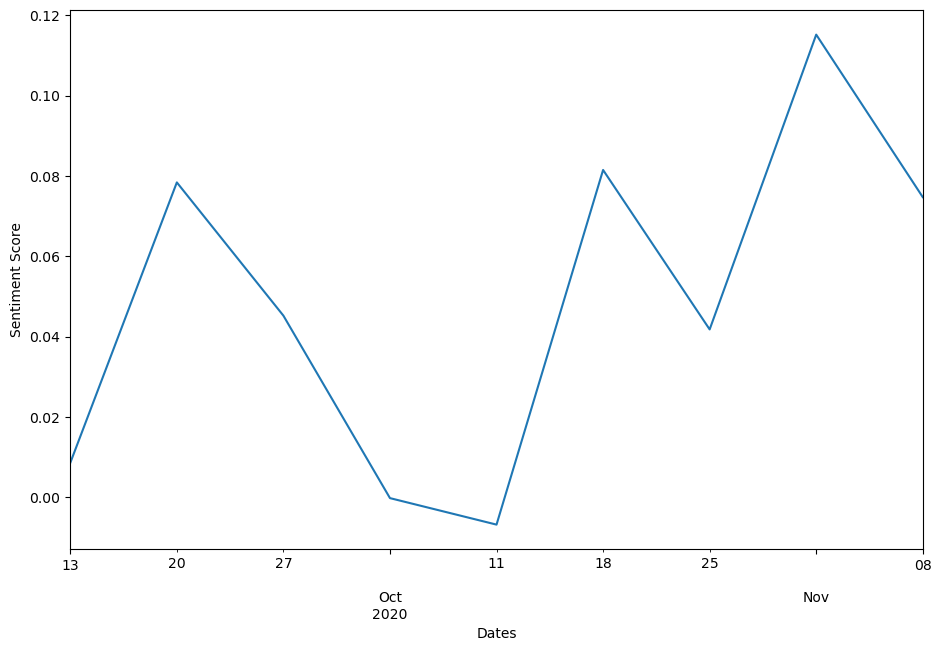

In [124]:
# Weekly average sentiment of articles.
weekly.plot(figsize = (11, 7))
plt.xlabel("Dates")
plt.ylabel("Sentiment Score");

# 🎬 Demo: Handling Nested Arrays of Keywords

The Times has done us a favor in providing the named entities in the articles, thus relieving us of having to do the tagging ourselves. However, the data structure that it comes in can be tricky to handle. Here, we provide a short tutorial showing one way to cleanly extract keyword data.

In [125]:
# Refer to a sample article's set of keywords
df.keywords.iloc[1]

[{'name': 'subject',
  'value': 'Demonstrations, Protests and Riots',
  'rank': 1,
  'major': 'N'},
 {'name': 'subject', 'value': 'Music', 'rank': 2, 'major': 'N'},
 {'name': 'subject', 'value': 'Pop and Rock Music', 'rank': 3, 'major': 'N'},
 {'name': 'persons',
  'value': 'Lukashenko, Aleksandr G',
  'rank': 4,
  'major': 'N'},
 {'name': 'glocations', 'value': 'Belarus', 'rank': 5, 'major': 'N'},
 {'name': 'glocations', 'value': 'Minsk (Belarus)', 'rank': 6, 'major': 'N'},
 {'name': 'subject',
  'value': 'Politics and Government',
  'rank': 7,
  'major': 'N'},
 {'name': 'subject', 'value': 'Elections', 'rank': 8, 'major': 'N'}]

We see a number of things here:
- Each article's keywords are laid out in a list of dictionaries.
- A dictionary tell us the name, type, ranking, and major of the keyword.
- The five types of keywords are: `subject`, `persons`, `glocations`, `organizations`, and `creative_works`.
- The ordering of the list corresponds to the ranking.
- All articles do not all have the same number of rankings.

We've created a function to extract keyword data based on the ranking. This function will be applied over the pandas series of keyword data.

In [126]:
def rank_extractor(data, rank):
    """Extracts keyword data based on ranking.

    Parameters
    ----------
    data : pd.DataFrame
        The dataframe containing the keywords.
    rank : int
        The rank of the keywords to extract.

    Returns
    -------
    keyword : dict
        A dictionary containing the name and value of the keyword.
    """
    # If empty, return None
    if data == []:
        return None
    # Iterate over the list of keywords until you reach the keyword corresponding with the ranking
    for keyword in data:
        if keyword["rank"] == rank:
            return {"name": keyword["name"], "value": keyword["value"]}

In [127]:
# Extract the first, second, and third keywords
rank1 = df.keywords.apply(lambda x: rank_extractor(x, 1))
rank2 = df.keywords.apply(lambda x: rank_extractor(x, 2))
rank3 = df.keywords.apply(lambda x: rank_extractor(x, 3))

In [128]:
# View results
rank1.head()

0    {'name': 'subject', 'value': 'News and News Me...
1    {'name': 'subject', 'value': 'Demonstrations, ...
2     {'name': 'persons', 'value': 'Harris, Kamala D'}
3    {'name': 'subject', 'value': 'Voting and Voters'}
4    {'name': 'subject', 'value': 'Great Britain Wi...
Name: keywords, dtype: object

Let's convert these dictionaries into `pandas` Series:

In [129]:
rank1 = rank1.apply(pd.Series)
rank2 = rank2.apply(pd.Series)
rank3 = rank3.apply(pd.Series)
rank1.head()

/var/folders/sy/_bbz4lwx7j79hkfq676xt87m0000gn/T/ipykernel_36510/3366469425.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rank1 = rank1.apply(pd.Series)
/var/folders/sy/_bbz4lwx7j79hkfq676xt87m0000gn/T/ipykernel_36510/3366469425.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rank1 = rank1.apply(pd.Series)
/var/folders/sy/_bbz4lwx7j79hkfq676xt87m0000gn/T/ipykernel_36510/3366469425.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rank1 = rank1.apply(pd.Series)
/var/folders/sy/_bbz4lwx7j79hkfq676xt87m0000gn/T/ipykernel_36510/3366469425.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in

,name,value
0,subject,News and News Media
1,subject,"Demonstrations, Protests and Riots"
2,persons,"Harris, Kamala D"
3,subject,Voting and Voters
4,subject,Great Britain Withdrawal from EU (Brexit)


Voila! A nice clean format. Now can we conduct some light analysis:

In [130]:
# Most frequent type of keyword in ranking #1
rank1.name.value_counts()

subject           1037
persons            279
glocations          87
organizations       71
creative_works      10
Name: name, dtype: int64

In [131]:
# The most common keywords in ranking #1:
rank1.value.value_counts()

Presidential Election of 2020            438
Trump, Donald J                           95
Biden, Joseph R Jr                        59
United States Politics and Government     53
Coronavirus (2019-nCoV)                   43
                                        ... 
Chinese-Americans                          1
Coal                                       1
Conley, Sean Patrick                       1
Secret Service                             1
Presidential Transition (US)               1
Name: value, Length: 373, dtype: int64